In [228]:
from scipy.interpolate import interp1d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [229]:
def wrangle(filename):

    df = pd.read_csv(filename)

    return df

In [230]:
smooth_70_df = wrangle('data/rough-70.csv')

In [231]:
smooth_70_df.head(10)

,index,volume,t,delta_p1,delta_p2
0,1,5.33,15.4,35570,30100
1,2,3.78,15.8,17260,14400
2,3,2.76,15.9,8940,7000
3,4,1.93,16.1,4270,2900
4,5,1.38,16.3,2090,1000
5,6,1.00,16.4,1020,0


In [232]:
x = smooth_70_df['volume'].to_numpy()
y_delta_p1 = smooth_70_df['delta_p1'].to_numpy()
y_delta_p2 = smooth_70_df['delta_p2'].to_numpy()
y_t = smooth_70_df['t'].to_numpy()

In [233]:
f_delta_p1 = interp1d(x, y_delta_p1, kind='cubic')
f_delta_p2 = interp1d(x, y_delta_p2, kind='cubic')
f_t = interp1d(x, y_t, kind='linear')

In [234]:
v_max = x[0]
v_min = x[-1]
v_max, v_min

(5.33, 1.0)

In [235]:
step = (v_max / v_min) ** (1 / 9)
step

1.2043354431533844

In [236]:
v_list = np.geomspace(v_max, v_min, num=10)
delta_p1_list = f_delta_p1(v_list)
delta_p2_list = f_delta_p2(v_list)
t_list = f_t(v_list)

In [237]:
list(np.around(v_list, 2))

[5.33, 4.43, 3.67, 3.05, 2.53, 2.1, 1.75, 1.45, 1.2, 1.0]

In [238]:
list(np.around(delta_p1_list / 1000, 2))

[35.57, 24.05, 16.27, 11.02, 7.49, 5.11, 3.46, 2.33, 1.55, 1.02]

In [239]:
list(np.around(delta_p2_list / 1000, 2))

[30.1, 20.34, 13.52, 8.85, 5.72, 3.63, 2.2, 1.21, 0.51, 0.0]

In [240]:
list(np.around(t_list, 2))

[15.4, 15.63, 15.81, 15.87, 15.95, 16.06, 16.17, 16.27, 16.35, 16.4]

In [241]:
xnew = np.linspace(x.min(), x.max(), num=100)

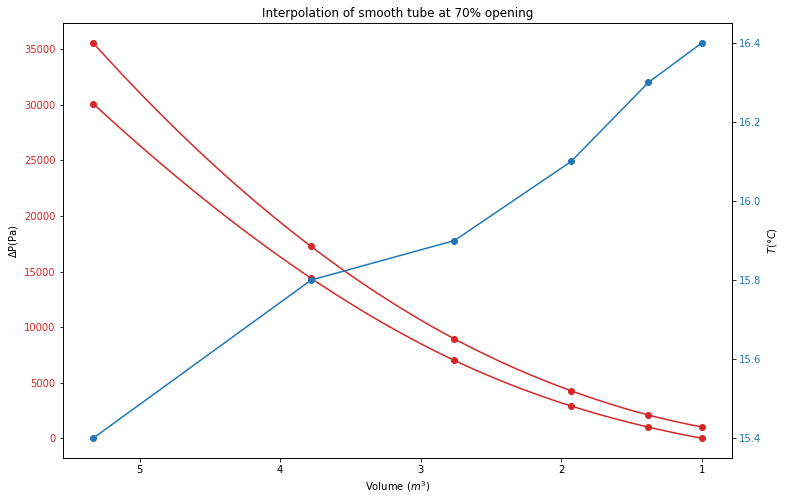

In [242]:
fig, ax1 = plt.subplots(figsize=(12, 8))
color = 'tab:red'
ax1.plot(x, y_delta_p1, 'o',color=color)
ax1.plot(xnew, f_delta_p1(xnew), '-', color=color)
ax1.plot(x, y_delta_p2, 'o',color=color)
ax1.plot(xnew, f_delta_p2(xnew), '-', color=color)
ax1.set_xlabel('Volume ($m^3$)')
ax1.set_ylabel('$\Delta$P(Pa)')
ax1.invert_xaxis()
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(x, y_t, 'o',color=color)
ax2.plot(xnew, f_t(xnew), '-', color=color)
ax2.set_ylabel('$T(\degree C)$')
ax2.tick_params(axis='y', labelcolor=color)



# plt.legend(['delta_p1', 'delta_p1 interpolated'], loc='best')
plt.title('Interpolation of smooth tube at 70% opening')

plt.show()